   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 88.1 MB/s eta 0:00:00
Reading /content/drive/MyDrive/Design_Project/dataset/43Abby_Resting.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...


/tmp/ipython-input-1841572353.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab('/content/drive/MyDrive/Design_Project/dataset/43Abby_Resting.set', preload=True)
/tmp/ipython-input-1841572353.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab('/content/drive/MyDrive/Design_Project/dataset/43Abby_Resting.set', preload=True)


<RawEEGLAB | 43Abby_Resting.fdt, 63 x 81921 (160.0 s), ~39.4 MiB, data loaded>
Channels: ['A3', 'A5', 'A7', 'A10', 'A12', 'A15', 'A17', 'A19', 'A21', 'A23', 'A25', 'A28', 'A30', 'A32', 'B2', 'B4', 'B7', 'B9', 'B11', 'B12', 'B14', 'B16', 'B18', 'B20', 'B22', 'B24', 'B26', 'B27', 'B29', 'B31', 'C2', 'C4', 'C5', 'C7', 'C8', 'C12', 'C14', 'C16', 'C17', 'C19', 'C21', 'C23', 'C25', 'C27', 'C29', 'C30', 'D2', 'D4', 'D5', 'D7', 'D8', 'D10', 'D12', 'D14', 'D16', 'D19', 'D21', 'D23', 'D24', 'D26', 'D28', 'D30', 'D31']
Sampling frequency: 512.0


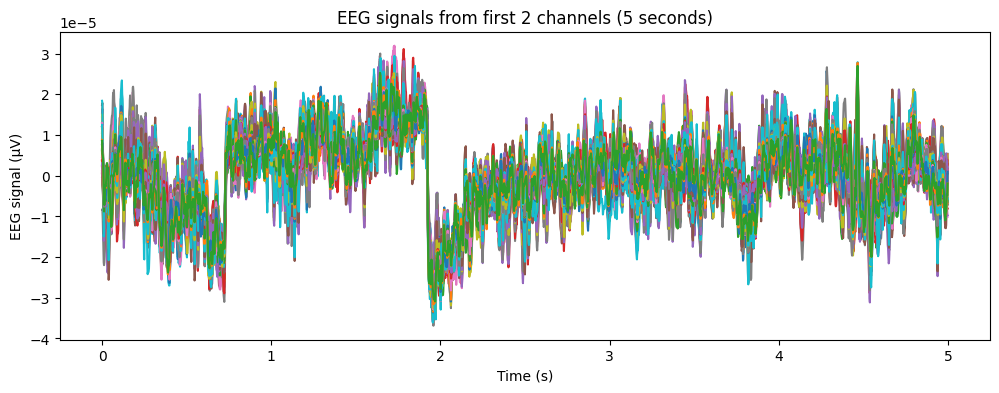

Using matplotlib as 2D backend.


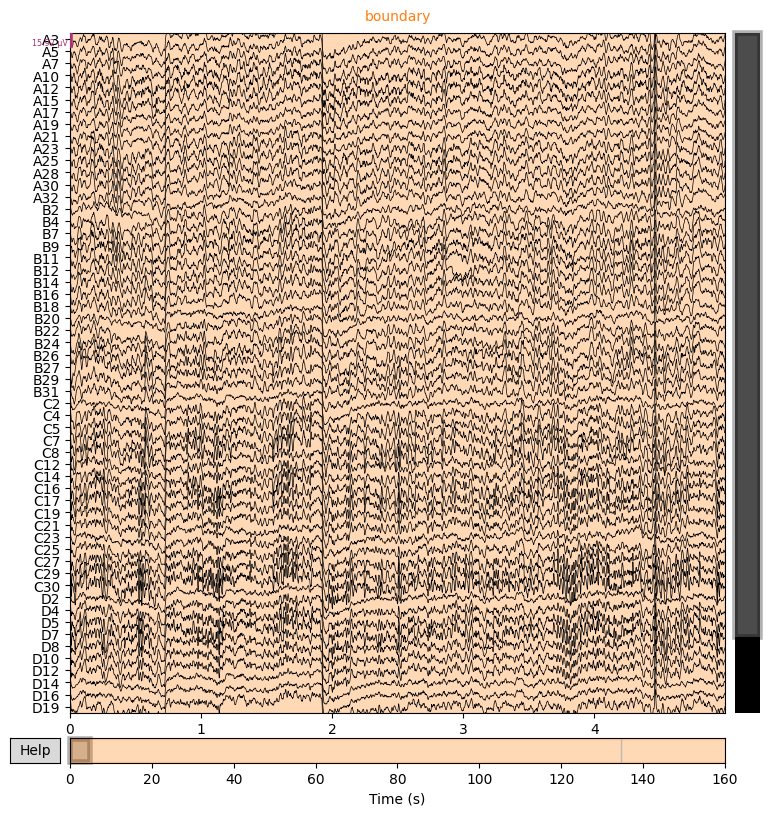

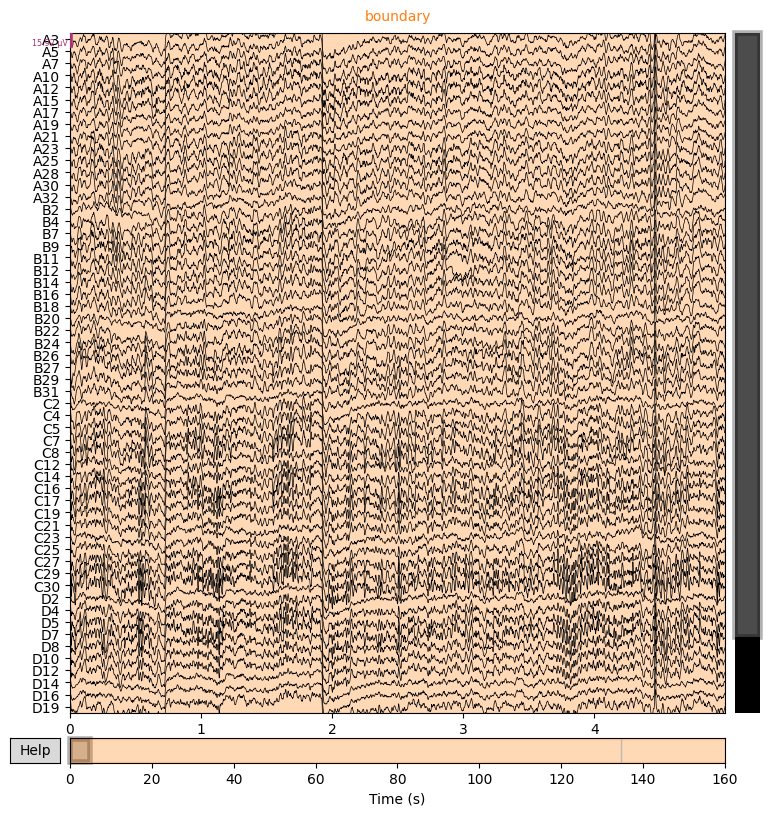

In [ ]:
# @title
!pip install mne #MNE-PYTHON

import mne
import matplotlib.pyplot as plt

raw = mne.io.read_raw_eeglab('/content/drive/MyDrive/Design_Project/dataset/43Abby_Resting.set', preload=True)

print(raw)
print("Channels:", raw.info['ch_names'])
print("Sampling frequency:", raw.info['sfreq'])

data, times = raw[:, 0:int(5 * raw.info['sfreq'])]
plt.figure(figsize=(12, 4))
plt.plot(times, data.T)
plt.xlabel("Time (s)")
plt.ylabel("EEG signal (µV)")
plt.title("EEG signals from first 2 channels (5 seconds)")
plt.show()


#raw.plot(n_channels=56, duration=5, scalings='auto')

<RawEEGLAB | 8Abby_Resting_cleaned.set, 60 x 81921 (160.0 s), ~37.6 MiB, data loaded>
Channels: ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'C2', 'C4', 'C6', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
Sampling frequency: 512.0


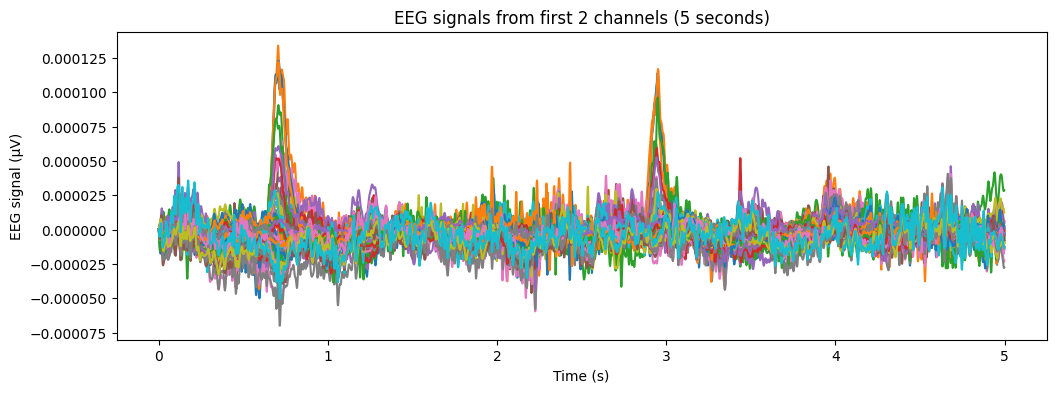

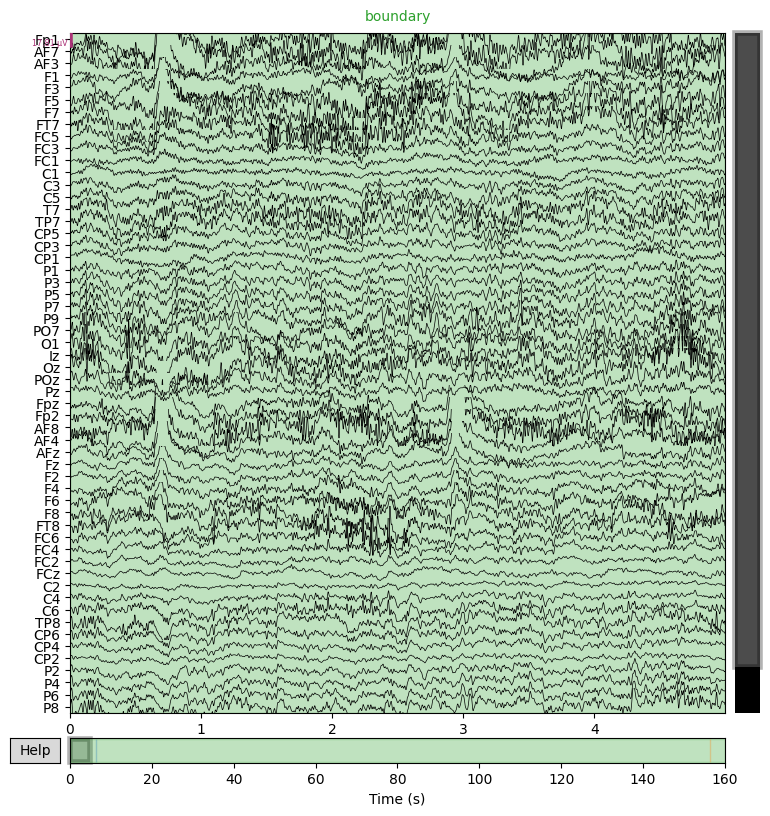

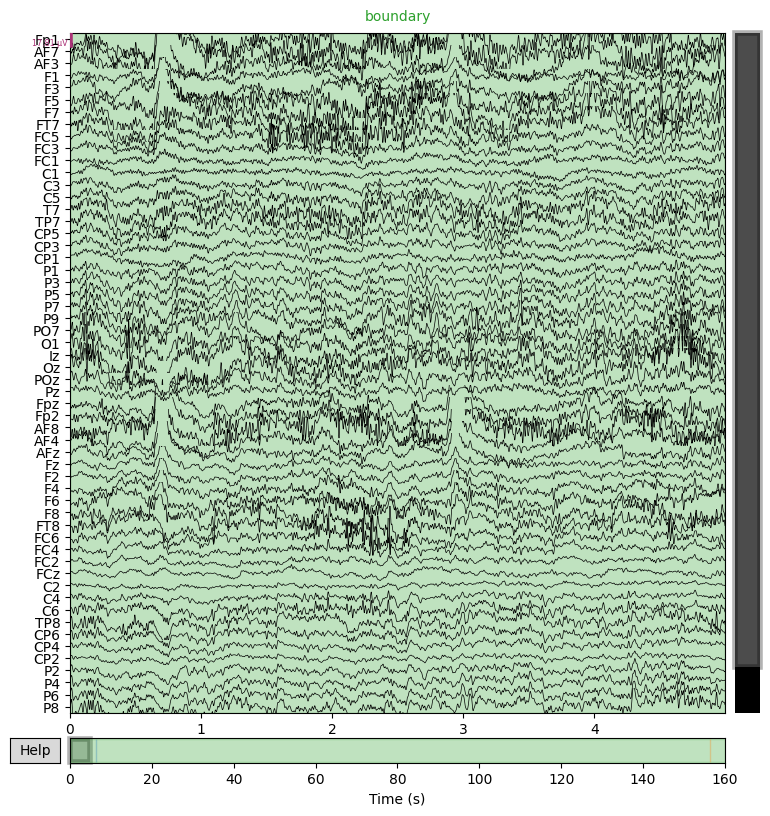

In [ ]:
# @title
# Install MNE (if not already installed)
!pip install mne

import mne
import matplotlib.pyplot as plt

# Load your EEG dataset (replace with your actual file name)
# Make sure both `1.set` and `1.fdt` are in the same folder in Colab
raw = mne.io.read_raw_eeglab('/content/drive/MyDrive/Design_Project/clean_data/8Abby_Resting_cleaned.set', preload=True)

# Print basic info
print(raw)
print("Channels:", raw.info['ch_names'])
print("Sampling frequency:", raw.info['sfreq'])

# Plot first 5 seconds of EEG from the first 2 channels
data, times = raw[:, 0:int(5 * raw.info['sfreq'])]  # first 5 sec
plt.figure(figsize=(
  12, 4))
plt.plot(times, data.T)
plt.xlabel("Time (s)")
plt.ylabel("EEG signal (µV)")
plt.title("EEG signals from first 2 channels (5 seconds)")
plt.show()

# You can also use MNE's built-in interactive plot
raw.plot(n_channels=56, duration=5, scalings='auto')

Reading /content/1Abby_Resting.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...
Effective window size : 4.000 (s)


/tmp/ipython-input-1032128625.py:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab("1Abby_Resting.set", preload=True)



--- Peak Alpha Frequency (PAF) ---
The Peak Alpha Frequency is: 11.00 Hz


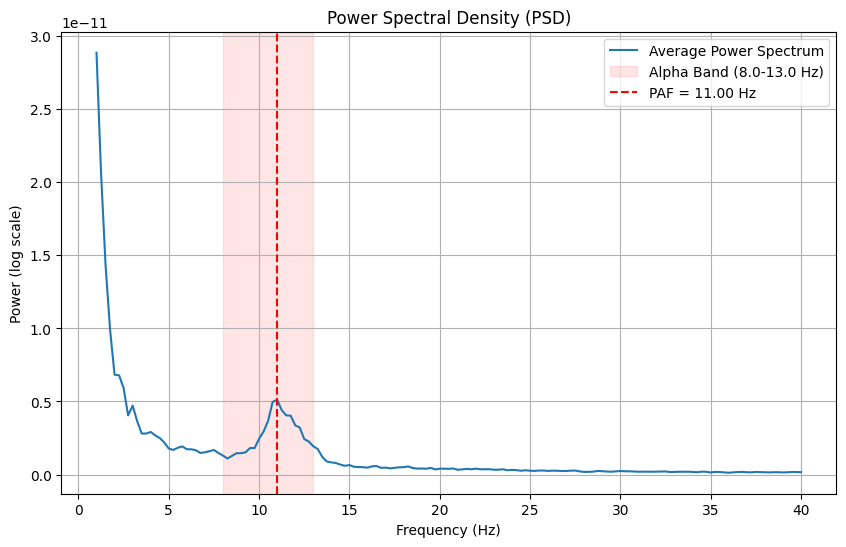

In [ ]:
# @title
import mne
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message="Limited 1 annotation(s) that were expanding outside the data range.")
warnings.filterwarnings("ignore", message="The data contains 'boundary' events, indicating data discontinuities.")

# Aplha band cutoffs
ALPHA_FMIN = 8.0  # 8 Hz
ALPHA_FMAX = 13.0 # 13 Hz

try:
    # load data
    raw = mne.io.read_raw_eeglab("1Abby_Resting.set", preload=True)

    # calculating the power spectrum
    # We'll look from 1 Hz to 40 Hz.
    # welch is a standard method for calculating this.
    spectrum = raw.compute_psd(method='welch', fmin=1.0, fmax=40.0)

    psds, freqs = spectrum.get_data(return_freqs=True)

    # Average the power across all 56 electrodes to get one global power spectrum --> this right here is because the dataset don't have the one reference electrode mentioned
    mean_psd = psds.mean(axis=0)


    # Find the positions in the freqs array that are between 8 and 13 Hz
    alpha_indices = np.where((freqs >= ALPHA_FMIN) & (freqs <= ALPHA_FMAX))[0]

    # Use these indices to get the alpha-band frequencies and their power
    alpha_freqs = freqs[alpha_indices]
    alpha_psd = mean_psd[alpha_indices]

    # Find the highest power band
    peak_index = np.argmax(alpha_psd)

    # The PAF is the frequency at that highest point
    paf = alpha_freqs[peak_index]

    print(f"The Peak Alpha Frequency is: {paf:.2f} Hz")



    plt.figure(figsize=(10, 6))

    plt.plot(freqs, mean_psd, label='Average Power Spectrum')

   # highlight the alpha band
    plt.axvspan(ALPHA_FMIN, ALPHA_FMAX, color='red', alpha=0.1, label=f'Alpha Band ({ALPHA_FMIN}-{ALPHA_FMAX} Hz)')

    # highlight PAF
    plt.axvline(x=paf, color='red', linestyle='--', label=f'PAF = {paf:.2f} Hz')

    plt.title('Power Spectral Density (PSD)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (log scale)')
    plt.legend()
    plt.grid(True)
    plt.show()


except FileNotFoundError:
    print("Error: The file '1Abby_Resting.set' (or its .fdt) was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Processing file 1/56: 1Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 11.00 Hz
Processing file 2/56: 2Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.00 Hz
Processing file 3/56: 3Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 11.25 Hz
Processing file 4/56: 4Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.50 Hz
Processing file 5/56: 5Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.25 Hz
Processing file 6/56: 6Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 7/56: 7Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.50 Hz
Processing file 8/56: 8Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 9/56: 9Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 11.75 Hz
Processing file 10/56: 10Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.75 Hz
Processing file 11/56: 11Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 12/56: 12Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.75 Hz
Processing file 13/56: 13Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.00 Hz
Processing file 14/56: 14Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.00 Hz
Processing file 15/56: 15Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.50 Hz
Processing file 16/56: 16Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 17/56: 17Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.25 Hz
Processing file 18/56: 18Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.00 Hz
Processing file 19/56: 19Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.50 Hz
Processing file 20/56: 20Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 11.75 Hz
Processing file 21/56: 21Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.50 Hz
Processing file 22/56: 22Abby_Resting.set
PAF detected: 9.75 Hz
Processing file 23/56: 23Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.00 Hz
Processing file 24/56: 24Abby_Resting.set
PAF detected: 9.50 Hz
Processing file 25/56: 25Abby_Resting.set
PAF detected: 10.50 Hz
Processing file 26/56: 26Abby_Resting.set
PAF detected: 10.25 Hz
Processing file 27/56: 27Abby_Resting.set
PAF detected: 11.00 Hz
Processing file 28/56: 28Abby_Resting.set
PAF detected: 10.00 Hz
Processing file 29/56: 29Abby_Resting.set
PAF detected: 8.50 Hz
Processing file 30/56: 30Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.25 Hz
Processing file 31/56: 31Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 11.25 Hz
Processing file 32/56: 32Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.50 Hz
Processing file 33/56: 33Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.00 Hz
Processing file 34/56: 34Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.25 Hz
Processing file 35/56: 35Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.00 Hz
Processing file 36/56: 36Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 37/56: 37Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.25 Hz
Processing file 38/56: 38Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 6 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 39/56: 39Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.25 Hz
Processing file 40/56: 40Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.50 Hz
Processing file 41/56: 41Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.25 Hz
Processing file 42/56: 42Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.25 Hz
Processing file 43/56: 43Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.00 Hz
Processing file 44/56: 44Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.25 Hz
Processing file 45/56: 45Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.75 Hz
Processing file 46/56: 46Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.00 Hz
Processing file 47/56: 47Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 11.25 Hz
Processing file 48/56: 48Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.50 Hz
Processing file 49/56: 49Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.75 Hz
Processing file 50/56: 50Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 51/56: 51Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.50 Hz
Processing file 52/56: 52Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.25 Hz
Processing file 53/56: 53Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.00 Hz
Processing file 54/56: 54Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 9.75 Hz
Processing file 55/56: 55Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 10.25 Hz
Processing file 56/56: 56Abby_Resting.set


/tmp/ipython-input-2682039046.py:41: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)


PAF detected: 8.25 Hz


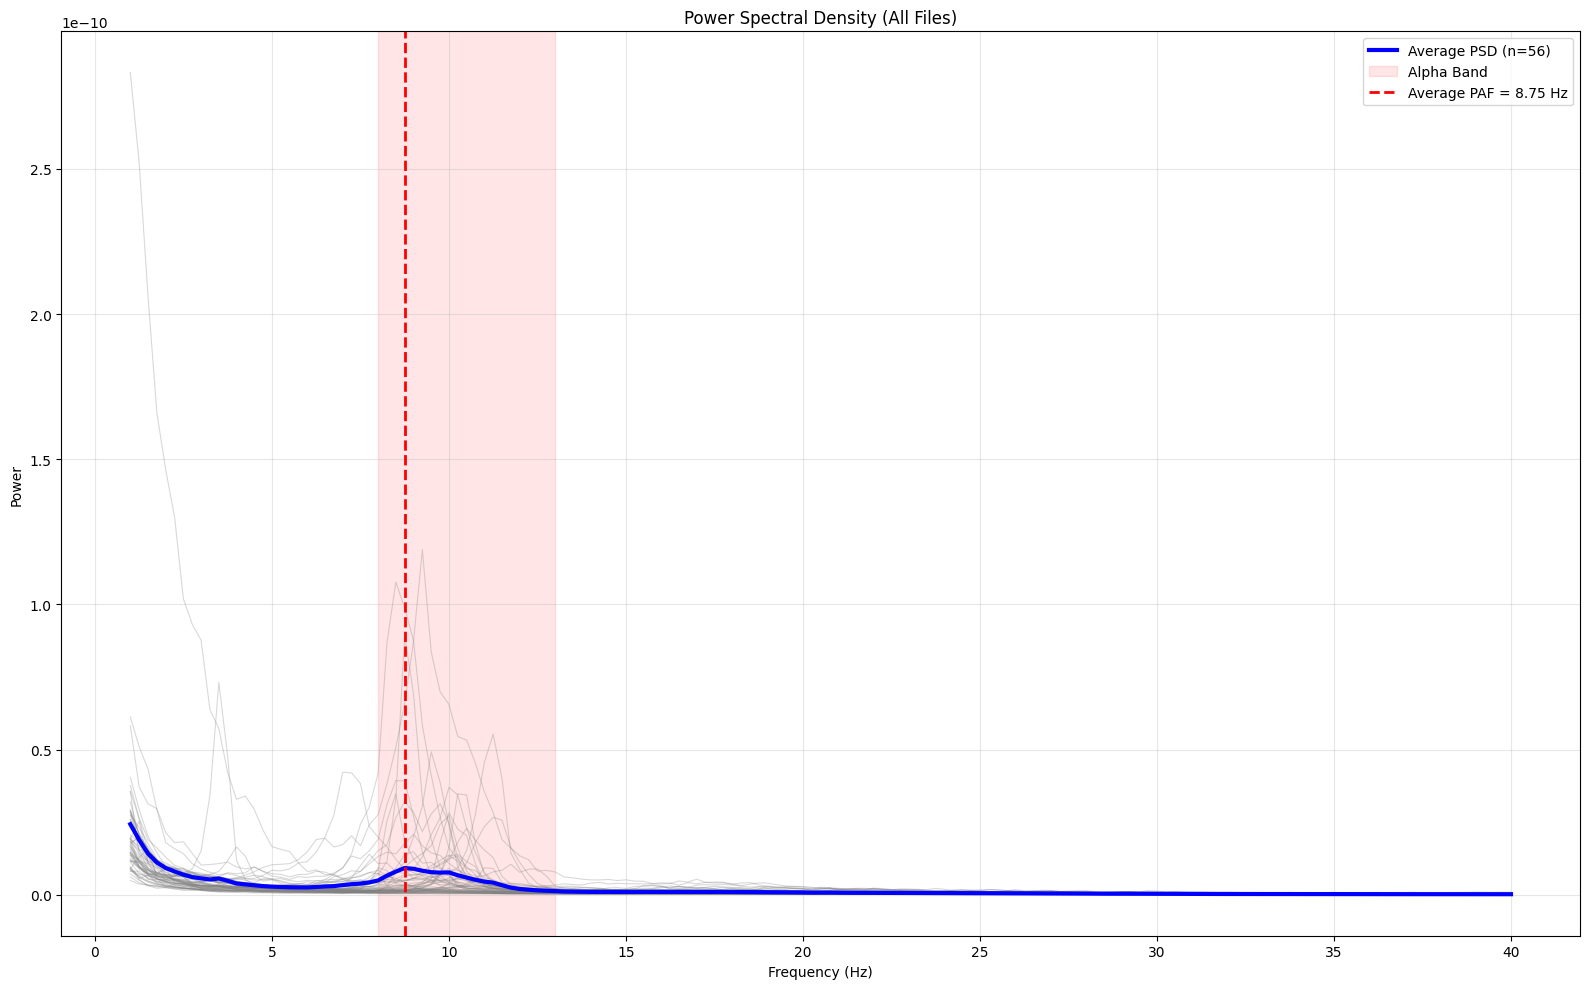


Summary Statistics
----------------------------------------
Files processed : 56
Mean PAF        : 9.57 Hz
Median PAF      : 9.75 Hz
Std Deviation   : 1.03 Hz
Minimum PAF     : 8.00 Hz
Maximum PAF     : 11.75 Hz
PAF (Avg PSD)   : 8.75 Hz


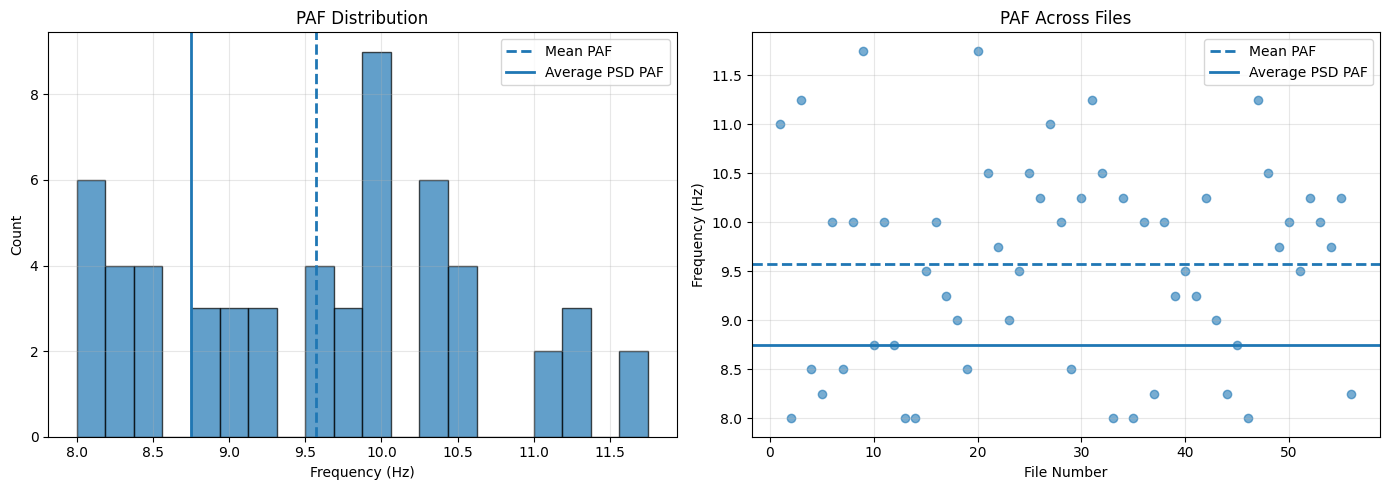


File-wise PAF values
-------------------------
  1 : 11.00 Hz
  2 : 8.00 Hz
  3 : 11.25 Hz
  4 : 8.50 Hz
  5 : 8.25 Hz
  6 : 10.00 Hz
  7 : 8.50 Hz
  8 : 10.00 Hz
  9 : 11.75 Hz
 10 : 8.75 Hz
 11 : 10.00 Hz
 12 : 8.75 Hz
 13 : 8.00 Hz
 14 : 8.00 Hz
 15 : 9.50 Hz
 16 : 10.00 Hz
 17 : 9.25 Hz
 18 : 9.00 Hz
 19 : 8.50 Hz
 20 : 11.75 Hz
 21 : 10.50 Hz
 22 : 9.75 Hz
 23 : 9.00 Hz
 24 : 9.50 Hz
 25 : 10.50 Hz
 26 : 10.25 Hz
 27 : 11.00 Hz
 28 : 10.00 Hz
 29 : 8.50 Hz
 30 : 10.25 Hz
 31 : 11.25 Hz
 32 : 10.50 Hz
 33 : 8.00 Hz
 34 : 10.25 Hz
 35 : 8.00 Hz
 36 : 10.00 Hz
 37 : 8.25 Hz
 38 : 10.00 Hz
 39 : 9.25 Hz
 40 : 9.50 Hz
 41 : 9.25 Hz
 42 : 10.25 Hz
 43 : 9.00 Hz
 44 : 8.25 Hz
 45 : 8.75 Hz
 46 : 8.00 Hz
 47 : 11.25 Hz
 48 : 10.50 Hz
 49 : 9.75 Hz
 50 : 10.00 Hz
 51 : 9.50 Hz
 52 : 10.25 Hz
 53 : 10.00 Hz
 54 : 9.75 Hz
 55 : 10.25 Hz
 56 : 8.25 Hz


In [ ]:
# @title Peak Alpha Frequency (PAF) Analysis

import mne
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

# Suppress common MNE warnings
warnings.filterwarnings(
    "ignore",
    message="Limited 1 annotation(s) that were expanding outside the data range."
)
warnings.filterwarnings(
    "ignore",
    message="The data contains 'boundary' events, indicating data discontinuities."
)

# Alpha band definition
ALPHA_FMIN = 8.0
ALPHA_FMAX = 13.0

# Dataset path
base_path = "/content/drive/MyDrive/Design_Project/dataset/"

# Storage
paf_results = []
all_psds = []
all_freqs = None

plt.figure(figsize=(16, 10))

# Process files
for file_num in range(1, 57):
    filename = f"{file_num}Abby_Resting.set"
    filepath = os.path.join(base_path, filename)

    try:
        print(f"Processing file {file_num}/56: {filename}")

        raw = mne.io.read_raw_eeglab(filepath, preload=True, verbose=False)

        spectrum = raw.compute_psd(
            method="welch",
            fmin=1.0,
            fmax=40.0,
            verbose=False
        )

        psds, freqs = spectrum.get_data(return_freqs=True)

        if all_freqs is None:
            all_freqs = freqs

        mean_psd = psds.mean(axis=0)
        all_psds.append(mean_psd)

        alpha_idx = np.where(
            (freqs >= ALPHA_FMIN) & (freqs <= ALPHA_FMAX)
        )[0]

        alpha_freqs = freqs[alpha_idx]
        alpha_psd = mean_psd[alpha_idx]
        paf = alpha_freqs[np.argmax(alpha_psd)]

        paf_results.append({
            "file": filename,
            "file_num": file_num,
            "paf": paf
        })

        plt.plot(freqs, mean_psd, alpha=0.3, linewidth=0.8, color="gray")

        print(f"PAF detected: {paf:.2f} Hz")

    except FileNotFoundError:
        print("File not found, skipping.")
    except Exception as e:
        print(f"Error processing file: {e}")

# Aggregate analysis
if all_psds:
    avg_psd = np.mean(all_psds, axis=0)

    alpha_idx = np.where(
        (all_freqs >= ALPHA_FMIN) & (all_freqs <= ALPHA_FMAX)
    )[0]

    avg_alpha_freqs = all_freqs[alpha_idx]
    avg_alpha_psd = avg_psd[alpha_idx]
    avg_paf = avg_alpha_freqs[np.argmax(avg_alpha_psd)]

    plt.plot(
        all_freqs,
        avg_psd,
        color="blue",
        linewidth=3,
        label=f"Average PSD (n={len(all_psds)})"
    )

    plt.axvspan(
        ALPHA_FMIN,
        ALPHA_FMAX,
        color="red",
        alpha=0.1,
        label="Alpha Band"
    )

    plt.axvline(
        x=avg_paf,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Average PAF = {avg_paf:.2f} Hz"
    )

    plt.title("Power Spectral Density (All Files)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    paf_values = [r["paf"] for r in paf_results]

    print("\nSummary Statistics")
    print("-" * 40)
    print(f"Files processed : {len(paf_values)}")
    print(f"Mean PAF        : {np.mean(paf_values):.2f} Hz")
    print(f"Median PAF      : {np.median(paf_values):.2f} Hz")
    print(f"Std Deviation   : {np.std(paf_values):.2f} Hz")
    print(f"Minimum PAF     : {np.min(paf_values):.2f} Hz")
    print(f"Maximum PAF     : {np.max(paf_values):.2f} Hz")
    print(f"PAF (Avg PSD)   : {avg_paf:.2f} Hz")

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].hist(
        paf_values,
        bins=20,
        edgecolor="black",
        alpha=0.7
    )
    axes[0].axvline(
        np.mean(paf_values),
        linestyle="--",
        linewidth=2,
        label="Mean PAF"
    )
    axes[0].axvline(
        avg_paf,
        linestyle="-",
        linewidth=2,
        label="Average PSD PAF"
    )
    axes[0].set_title("PAF Distribution")
    axes[0].set_xlabel("Frequency (Hz)")
    axes[0].set_ylabel("Count")
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    file_nums = [r["file_num"] for r in paf_results]
    axes[1].scatter(file_nums, paf_values, alpha=0.6)
    axes[1].axhline(
        np.mean(paf_values),
        linestyle="--",
        linewidth=2,
        label="Mean PAF"
    )
    axes[1].axhline(
        avg_paf,
        linestyle="-",
        linewidth=2,
        label="Average PSD PAF"
    )
    axes[1].set_title("PAF Across Files")
    axes[1].set_xlabel("File Number")
    axes[1].set_ylabel("Frequency (Hz)")
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\nFile-wise PAF values")
    print("-" * 25)
    for r in paf_results:
        print(f"{r['file_num']:>3} : {r['paf']:.2f} Hz")

else:
    print("No files were successfully processed.")


**ICA display**

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA... this may take a moment.
Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 17.6s.

ICA is fit. Now, let's find the artifacts.
Creating RawArray with float64 data, n_channels=20, n_times=81921
    Range : 0 ... 81920 =      0.000 ...   160.000 secs
Ready.


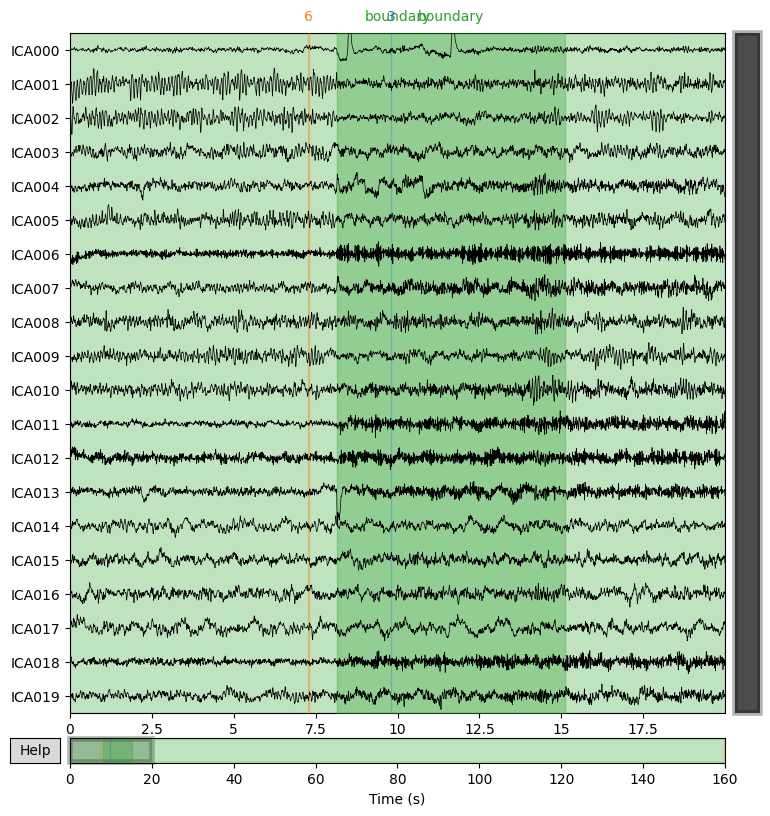


Components marked as bad: []


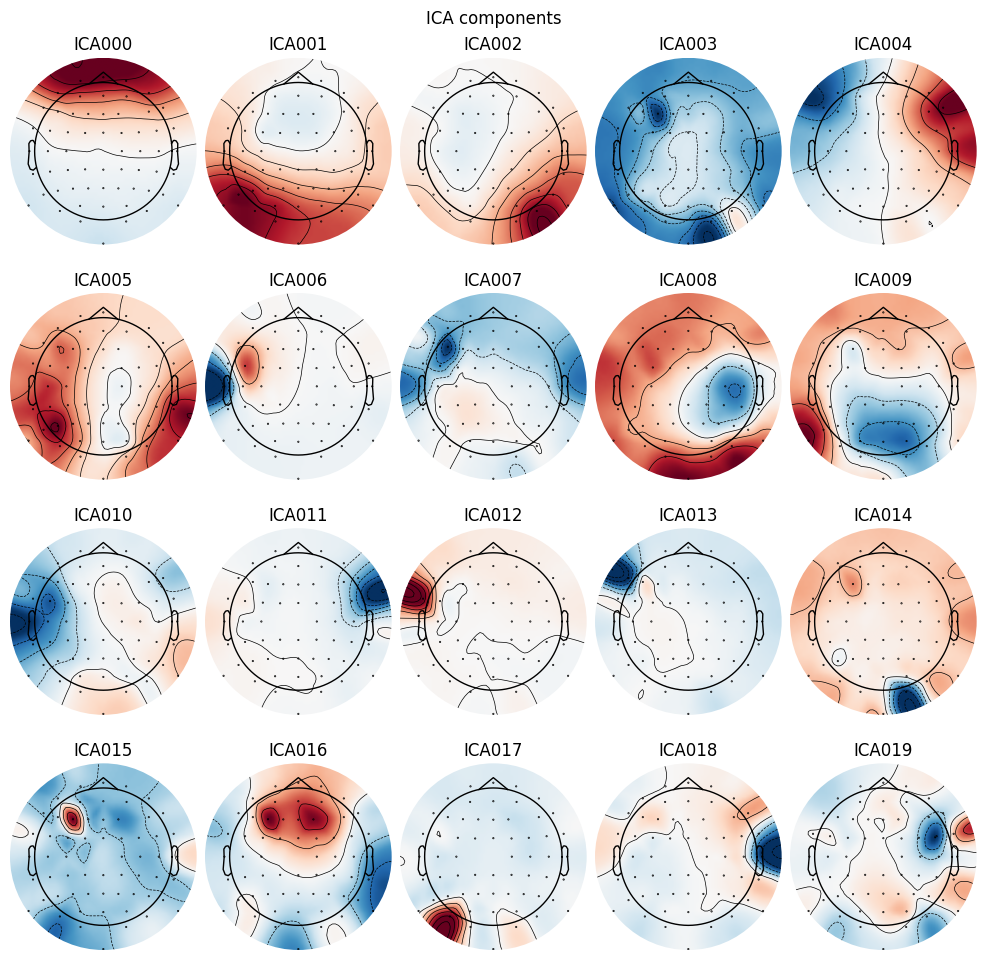

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 60 PCA components

Artifact removal complete. Showing 'before' and 'after' plots.


In [ ]:
# @title
import mne
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress common MNE warnings
warnings.filterwarnings("ignore", message="Limited 1 annotation(s) that were expanding outside the data range.")
warnings.filterwarnings("ignore", message="The data contains 'boundary' events, indicating data discontinuities.")

try:
    raw = mne.io.read_raw_eeglab("/content/drive/MyDrive/Design_Project/clean_data/11Abby_Resting_cleaned.set", preload=True)

    # This removes slow drifts like below 1Hz that can confuse the algorithm.
    # We make a copy so we don't change our original raw object yet.
    raw_filtered = raw.copy().filter(l_freq=1.0, h_freq=40.0)


    # Initialize the ICA object
    # we will try to dismantel in 20 components, generally 20 or 15 components are a sweet spot
    ica = mne.preprocessing.ICA(n_components=20, random_state=97)


    print("Fitting ICA... this may take a moment.")
    ica.fit(raw_filtered)

     #this will plot the ica components

    ica.plot_sources(raw_filtered, title="Click on artifact components to mark them as bad")


   # print(f"\nComponents marked as bad: {ica.exclude}") --> this thing won't work in collab or kaggle because they won't open intereactive window.
   #This is just for illustration purpose we too executed the ICA vizualization and plotting in matlab using eeglab plugin


   # this will plot the scalp map of the ica components
    ica.plot_components()


    # It is not a strict requirement to apply ica on unfiltered data, but we opted for it
    raw_clean = raw.copy()

    #here ica will remove the bad components that we have selected
    ica.apply(raw_clean)


# Again i would like to clarify that the steps below can't be implemented in Collab or kaggle because of non-interactive enviroment
# our sole purpose here was to show the interested ones how the ica can separate the components and display them
 #  print("\nArtifact removal complete. Showing 'before' and 'after' plots.")

    # Plot the original data (you will see blinks)
    #raw.plot(title="Original Data (Before ICA)", n_channels=20, duration=10)

    # Plot the cleaned data (blinks should be gone or much smaller)
   # raw_clean.plot(title="Cleaned Data (After ICA)", n_channels=20, duration=10)


except FileNotFoundError:
    print("Error: The file '1Abby_Resting.set' (or its .fdt) was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Reading /content/drive/MyDrive/Design_Project/cleaned_output_data/11Abby_Resting_cleanedICACLEAN_subject.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA... this may take a moment.
Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 22.6s.

ICA is fit. Now, let's find the artifacts.
Creating RawArray with float64 data, n_channels=20

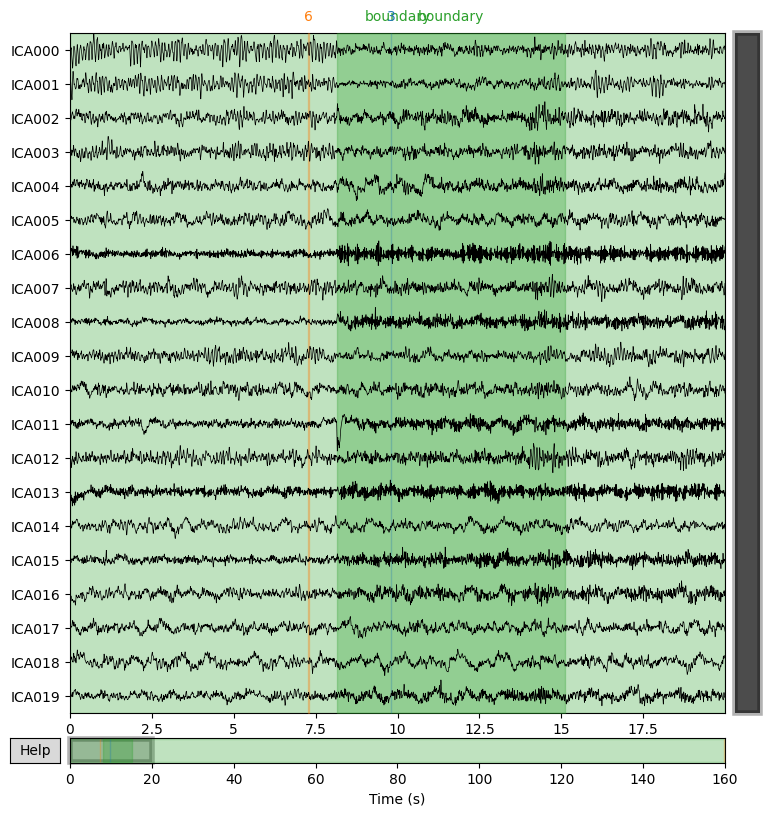


Components marked as bad: []


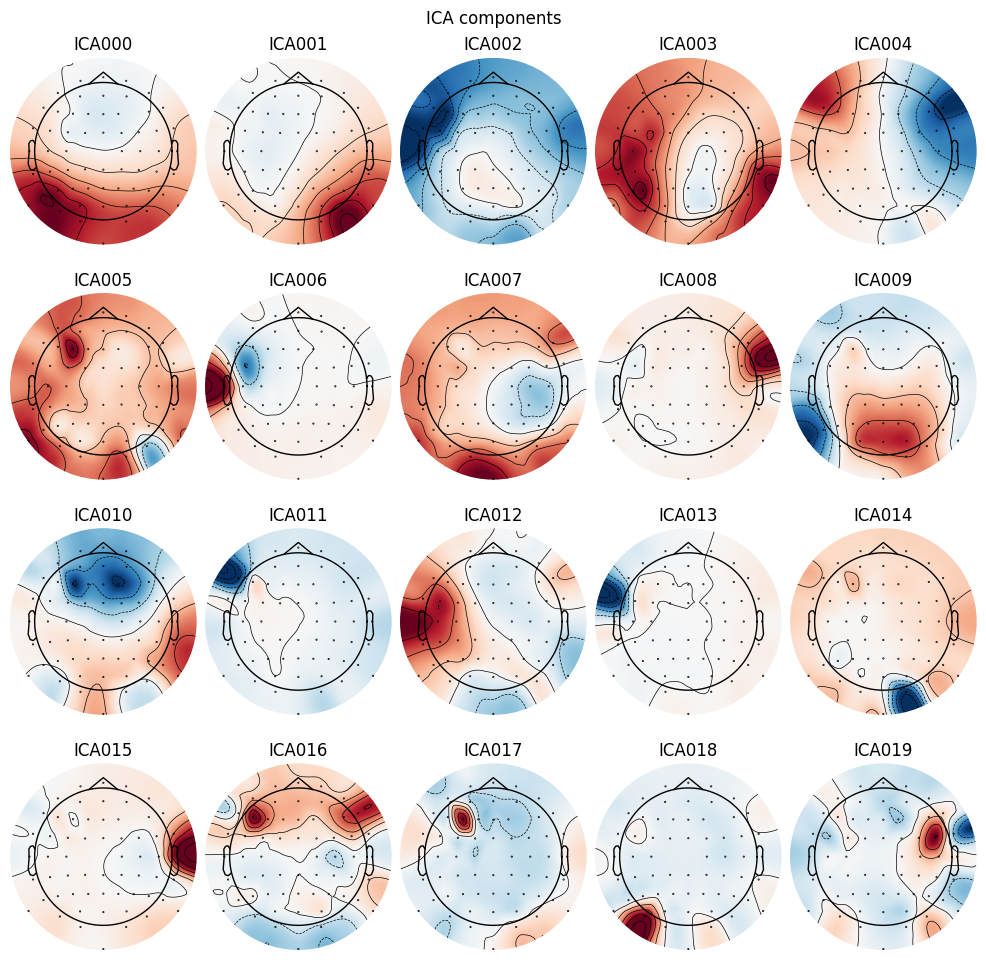

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 60 PCA components

Artifact removal complete. Showing 'before' and 'after' plots.


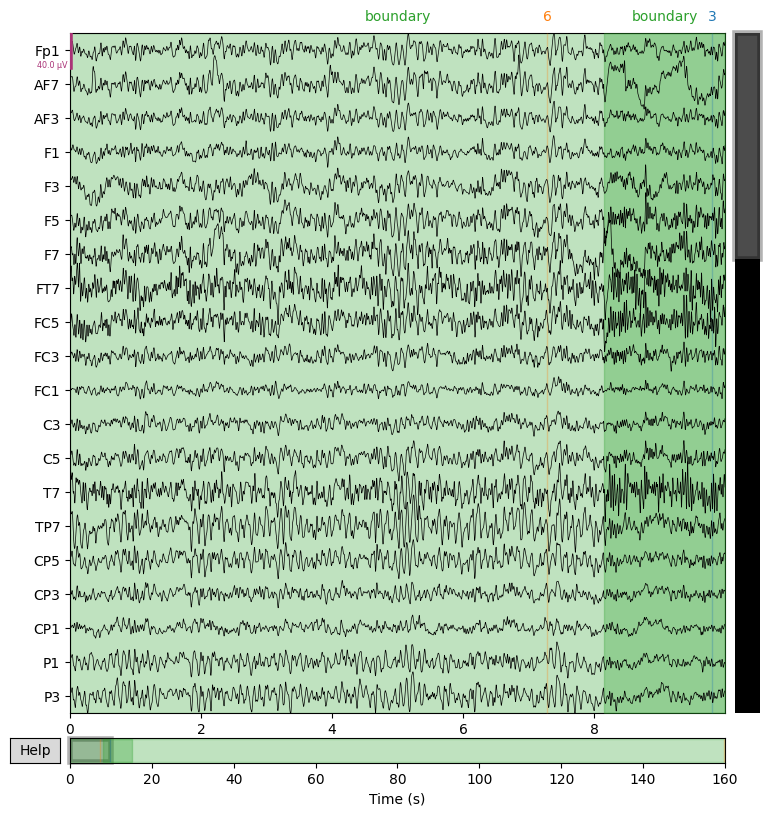

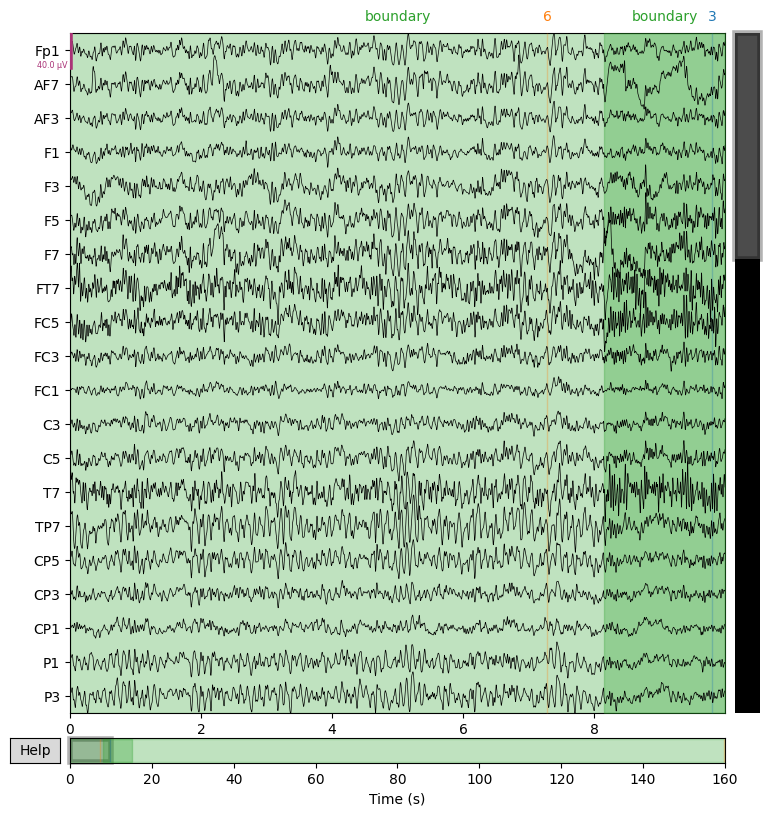

In [ ]:
# @title
import mne
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message="Limited 1 annotation(s) that were expanding outside the data range.")
warnings.filterwarnings("ignore", message="The data contains 'boundary' events, indicating data discontinuities.")

try:
    raw = mne.io.read_raw_eeglab("/content/drive/MyDrive/Design_Project/cleaned_output_data/11Abby_Resting_cleanedICACLEAN_subject.set", preload=True)


    raw_filtered = raw.copy().filter(l_freq=1.0, h_freq=40.0)
    ica = mne.preprocessing.ICA(n_components=20, random_state=97)

    print("Fitting ICA... this may take a moment.")
    ica.fit(raw_filtered)

    print("\nICA is fit. Now, let's find the artifacts.")

    ica.plot_sources(raw_filtered, title="Click on artifact components to mark them as bad")
    print(f"\nComponents marked as bad: {ica.exclude}")

    ica.plot_components()

    raw_clean = raw.copy()

    ica.apply(raw_clean)
    print("\nArtifact removal complete. Showing 'before' and 'after' plots.")
    raw.plot(title="Original Data (Before ICA)", n_channels=20, duration=10)

    raw_clean.plot(title="Cleaned Data (After ICA)", n_channels=20, duration=10)


except FileNotFoundError:
    print("Error: The file '1Abby_Resting.set' (or its .fdt) was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# **REAL-WORK**

**Filtering and saving the files**

In [ ]:
# @title
import mne
import os

# Path to raw dataset folder
data_path = "/content/drive/MyDrive/Design_Project/dataset"

# Path for saving cleaned data
save_path = "" #remomved path to prevent misclick and duplicate this things

# Create output directory if missing
os.makedirs(save_path, exist_ok=True)

# Loop over all .set files (each has a .fdt partner automatically)
for file in os.listdir(data_path):
    if file.endswith(".set"):
        full_path = os.path.join(data_path, file)
        print("Processing:", file)

        # Load EEG in EEGLAB format
        raw = mne.io.read_raw_eeglab(full_path, preload=True)

        # 1) Band-pass (0.1–60 Hz)
        raw.filter(l_freq=0.1, h_freq=60)

        # 2) Notch filter @ 60 Hz
        raw.notch_filter(freqs=60)

        # Save cleaned EEG
        out_file = os.path.join(save_path, file.replace(".set", "_cleaned.set"))
        mne.export.export_raw(out_file, raw, fmt="eeglab")

        print("Saved:", out_file)

print("\n Finished cleaning all patients")


**Segmentation and DWT**

In [ ]:
# @title
import numpy as np
import pandas as pd
import pywt
from scipy.stats import entropy as shannon_entropy
import warnings
import mne
import glob
import os


input_folder = "/content/drive/MyDrive/Design_Project/cleaned_output_data"
output_folder = "/content/drive/MyDrive/Design_Project/Seg_DWT_data2"

SEGMENT_DURATION_SEC = 20.0 # one of the four segmentation techniques we used.
OVERLAP_DURATION_SEC = 14.0

wavelet = 'db4' # wavelet type
dwt_level = 4
band_names = ['Delta_Theta', 'Alpha', 'Beta', 'Gamma_1', 'Gamma_2']


def calculate_shannon_entropy(data, n_bins=10):
    counts, _ = np.histogram(data, bins=n_bins)
    probabilities = counts / len(data)
    probabilities = probabilities[probabilities > 0]
    return shannon_entropy(probabilities, base=2)

def calculate_energy(data):
    return np.sum(np.square(data))

#warnings.filterwarnings("ignore")

os.makedirs(output_folder, exist_ok=True)

# get all files
files = sorted(glob.glob(os.path.join(input_folder, "*.set")))
print(f"Found {len(files)} EEG files to process.")


for file_path in files:
    try:
        print(f"Processing: {os.path.basename(file_path)}")
        print(f"===============================")

        # Load EEG
        raw_clean = mne.io.read_raw_eeglab(file_path, preload=True)
        ch_names = raw_clean.info['ch_names']

        # Downsample, here we downsampled from 512 to 256, it saves resources and also don't have any significant on the data quality
        raw_clean.resample(256)

        # Segmentaion
        epochs = mne.make_fixed_length_epochs(
            raw_clean,
            duration=SEGMENT_DURATION_SEC,
            overlap=OVERLAP_DURATION_SEC,
            preload=True
        )

        all_rows = []

        for i, segment_data in enumerate(epochs):
            row_features = {}
            for ch_index, ch_name in enumerate(ch_names):
                ch_data = segment_data[ch_index]
                coeffs = pywt.wavedec(ch_data, wavelet, level=dwt_level)

                for band_index, band_name in enumerate(band_names):
                    band_coeffs = coeffs[band_index]
                    row_features[f"{ch_name}_{band_name}_Entropy"] = calculate_shannon_entropy(band_coeffs)
                    row_features[f"{ch_name}_{band_name}_Energy"] = calculate_energy(band_coeffs)

            all_rows.append(row_features)
            print(f"  Segment {i+1}/{len(epochs)} done")

        # Create DataFrame
        df = pd.DataFrame(all_rows)

        # Output filename uses subject name automatically
        subject_name = os.path.basename(file_path).replace(".set", "")
        output_file = os.path.join(output_folder, f"{subject_name}_features.csv")

        df.to_csv(output_file, index=False)
        print(f"\nSaved → {output_file}")
        print(f"Shape: {df.shape}")

    except Exception as e:
        print(f"Could not process file: {os.path.basename(file_path)}")
        print(f"Error message: {e}")
        print(f"Skipping to next file.")
        print(f"-------------------\n")

print("\nALL FILES DONE")

Found 56 EEG files to process.

Processing: 10Abby_Resting_cleanedICACLEAN_subject.set
Reading /content/drive/MyDrive/Design_Project/cleaned_output_data/10Abby_Resting_cleanedICACLEAN_subject.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 2560 original time points ...
0 bad epochs dropped
  Segment 1/31 done
  Segment 2/31 done
  Segment 3/31 done
  Segment 4/31 done
  Segment 5/31 done
  Segment 6/31 done
  Segment 7/31 done
  Segment 8/31 done
  Segment 9/31 done
  Segment 10/31 done
  Segment 11/31 done
  Segment 12/31 done
  Segment 13/31 done
  Segment 14/31 done
  Segment 15/31 done
  Segment 16/31 done
  Segment 17/31 done
  Segment 18/31 done
  Segment 19/31 done
  Segment 20/31 done
  Segment 21/31 done
  Segment 22/31 done
  Segment 23/31 done
  Segment 24/31 done
  Segment 25/31 done
  Segment 26/31 done
  Segm

**New 5+3 segmentation part**

In [ ]:
# @title
import numpy as np
import pandas as pd
import pywt
from scipy.stats import entropy as shannon_entropy
import warnings
import mne
import glob
import os


input_folder = "/content/drive/MyDrive/Design_Project/cleaned_output_data"
output_folder = "/content/drive/MyDrive/Design_Project/Seg_DWT_data2"

SEGMENT_DURATION_SEC = 5.0 # one of the four segmentation techniques we used.
OVERLAP_DURATION_SEC = 3.0

wavelet = 'db4' # wavelet type
dwt_level = 4
band_names = ['Delta_Theta', 'Alpha', 'Beta', 'Gamma_1', 'Gamma_2']


def calculate_shannon_entropy(data, n_bins=10):
    counts, _ = np.histogram(data, bins=n_bins)
    probabilities = counts / len(data)
    probabilities = probabilities[probabilities > 0]
    return shannon_entropy(probabilities, base=2)

def calculate_energy(data):
    return np.sum(np.square(data))

#warnings.filterwarnings("ignore")

os.makedirs(output_folder, exist_ok=True)

# get all files
files = sorted(glob.glob(os.path.join(input_folder, "*.set")))
print(f"Found {len(files)} EEG files to process.")


for file_path in files:
    try:
        print(f"Processing: {os.path.basename(file_path)}")
        print(f"===============================")

        # Load EEG
        raw_clean = mne.io.read_raw_eeglab(file_path, preload=True)
        ch_names = raw_clean.info['ch_names']

        # Downsample, here we downsampled from 512 to 256, it saves resources and also don't have any significant on the data quality
        raw_clean.resample(256)

        # Segmentaion
        epochs = mne.make_fixed_length_epochs(
            raw_clean,
            duration=SEGMENT_DURATION_SEC,
            overlap=OVERLAP_DURATION_SEC,
            preload=True
        )

        all_rows = []

        for i, segment_data in enumerate(epochs):
            row_features = {}
            for ch_index, ch_name in enumerate(ch_names):
                ch_data = segment_data[ch_index]
                coeffs = pywt.wavedec(ch_data, wavelet, level=dwt_level)

                for band_index, band_name in enumerate(band_names):
                    band_coeffs = coeffs[band_index]
                    row_features[f"{ch_name}_{band_name}_Entropy"] = calculate_shannon_entropy(band_coeffs)
                    row_features[f"{ch_name}_{band_name}_Energy"] = calculate_energy(band_coeffs)

            all_rows.append(row_features)
            print(f"  Segment {i+1}/{len(epochs)} done")

        # Create DataFrame
        df = pd.DataFrame(all_rows)

        # Output filename uses subject name automatically
        subject_name = os.path.basename(file_path).replace(".set", "")
        output_file = os.path.join(output_folder, f"{subject_name}_features.csv")

        df.to_csv(output_file, index=False)
        print(f"\nSaved → {output_file}")
        print(f"Shape: {df.shape}")

    except Exception as e:
        print(f"Could not process file: {os.path.basename(file_path)}")
        print(f"Error message: {e}")
        print(f"Skipping to next file.")
        print(f"-------------------\n")

print("\nALL FILES DONE")

Found 56 EEG files to process.

Processing: 10Abby_Resting_cleanedICACLEAN_subject.set
Reading /content/drive/MyDrive/Design_Project/cleaned_output_data/10Abby_Resting_cleanedICACLEAN_subject.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 5120 original time points ...
0 bad epochs dropped
  Segment 1/47 done
  Segment 2/47 done
  Segment 3/47 done
  Segment 4/47 done
  Segment 5/47 done
  Segment 6/47 done
  Segment 7/47 done
  Segment 8/47 done
  Segment 9/47 done
  Segment 10/47 done
  Segment 11/47 done
  Segment 12/47 done
  Segment 13/47 done
  Segment 14/47 done
  Segment 15/47 done
  Segment 16/47 done
  Segment 17/47 done
  Segment 18/47 done
  Segment 19/47 done
  Segment 20/47 done
  Segment 21/47 done
  Segment 22/47 done
  Segment 23/47 done
  Segment 24/47 done
  Segment 25/47 done
  Segment 26/47 done
  Segm

**DWT on whole EEG data**

In [ ]:
# @title
import numpy as np
import pandas as pd
import pywt
from scipy.stats import entropy as shannon_entropy
import warnings
import mne
import glob
import os

input_folder = "/content/drive/MyDrive/Design_Project/cleaned_output_data"
output_folder = "/content/drive/MyDrive/Design_Project/Whole_eeg"

wavelet = 'db4'
dwt_level = 4
band_names = ['Delta_Theta', 'Alpha', 'Beta', 'Gamma_1', 'Gamma_2']


def calculate_shannon_entropy(data, n_bins=10):
    counts, _ = np.histogram(data, bins=n_bins)
    probabilities = counts / len(data)
    probabilities = probabilities[probabilities > 0]
    return shannon_entropy(probabilities, base=2)

warnings.filterwarnings("ignore")
os.makedirs(output_folder, exist_ok=True)

files = sorted(glob.glob(os.path.join(input_folder, "*.set")))
print(f"Found {len(files)} EEG files to process.")

for file_path in files:

    try:
        print(f"Processing: {os.path.basename(file_path)}")
        print("===============================")

        # Load EEG
        raw_clean = mne.io.read_raw_eeglab(file_path, preload=True)
        ch_names = raw_clean.info['ch_names']

        # Downsample
        raw_clean.resample(256)

        # Get entire EEG signal
        eeg_data = raw_clean.get_data()

        row_features = {}

        # Feature extraction
        for ch_index, ch_name in enumerate(ch_names):
            ch_data = eeg_data[ch_index]
            coeffs = pywt.wavedec(ch_data, wavelet, level=dwt_level)

            for band_index, band_name in enumerate(band_names):
                band_coeffs = coeffs[band_index]
                row_features[f"{ch_name}_{band_name}_Entropy"] = calculate_shannon_entropy(band_coeffs)

        # Subject name
        subject_name = os.path.basename(file_path).replace(".set", "")

        # Convert to DataFrame (1 row)
        df = pd.DataFrame([row_features])

        # Output CSV path
        output_file = os.path.join(output_folder, f"{subject_name}_whole.csv")

        df.to_csv(output_file, index=False)

        print(f"Saved: {output_file}")
        print("Shape:", df.shape)

    except Exception as e:
        print(f"Could not process: {os.path.basename(file_path)}")
        print(f"MSG: {e}")
        print("-------------------\n")

print("\nAll files done..")


Found 56 EEG files to process.

Processing: 10Abby_Resting_cleanedICACLEAN_subject.set
Reading /content/drive/MyDrive/Design_Project/cleaned_output_data/10Abby_Resting_cleanedICACLEAN_subject.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...
✔ Saved: /content/drive/MyDrive/Design_Project/Whole_eeg/10Abby_Resting_cleanedICACLEAN_subject_whole.csv
Shape: (1, 295)

Processing: 11Abby_Resting_cleanedICACLEAN_subject.set
Reading /content/drive/MyDrive/Design_Project/cleaned_output_data/11Abby_Resting_cleanedICACLEAN_subject.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...
✔ Saved: /content/drive/MyDrive/Design_Project/Whole_eeg/11Abby_Resting_cleanedICACLEAN_subject_whole.csv
Shape: (1, 300)

Processing: 12Abby_Resting_cleanedICACLEAN_subject.set
Reading /content/drive/MyDrive/Design_Project/cleaned_output_data/12Abby_Resting_cleanedICACLEAN_subject.fdt
Reading 0 ... 81920  =      0.000 ...   160.000 secs...
✔ Saved: /content/drive/MyDrive/Design_Project/Whole_eeg/12Abb

**To Label**

In [ ]:
# @title Label Feature Files Using Metadata

import pandas as pd
import re
import glob
import os
import warnings

# Paths
input_folder = "/content/drive/MyDrive/Design_Project/Seg_DWT_data2"
metadata_file = "/content/drive/MyDrive/Design_Project/metadata.csv"
output_folder = "/content/drive/MyDrive/Design_Project/Final_label2"

# Metadata columns to append
METADATA_COLS = ["AgeMonths", "Group", "Gender", "SRS_Total"]


def label_all_files():
    """
    Iterates over all feature CSV files, matches each file with
    participant metadata using the participant ID extracted from
    the filename, and saves labeled files to the output directory.
    """

    warnings.filterwarnings("ignore")
    os.makedirs(output_folder, exist_ok=True)

    print(f"Output directory: {output_folder}")

    # Load metadata
    try:
        meta = pd.read_csv(metadata_file)
        meta["ParticipantID"] = meta["ParticipantID"].astype(int)
        print(f"Loaded metadata for {len(meta)} participants.")
    except FileNotFoundError:
        print(f"Metadata file not found: {metadata_file}")
        return
    except KeyError:
        print("Column 'ParticipantID' not found in metadata file.")
        return

    # Locate feature files
    feature_files = sorted(glob.glob(os.path.join(input_folder, "*.csv")))
    if not feature_files:
        print(f"No CSV files found in input directory: {input_folder}")
        return

    print(f"Number of feature files found: {len(feature_files)}")

    success_count = 0
    fail_count = 0

    # Process each feature file
    for file_path in feature_files:
        base_name = os.path.basename(file_path)
        print(f"\nProcessing file: {base_name}")

        try:
            # Extract participant ID from filename
            match = re.match(r"(\d+)", base_name)
            if not match:
                print("Participant ID could not be extracted from filename. Skipping file.")
                fail_count += 1
                continue

            participant_id = int(match.group(1))

            # Load feature data
            df = pd.read_csv(file_path)

            # Match metadata
            row = meta[meta["ParticipantID"] == participant_id]
            if row.empty:
                print(f"No metadata found for ParticipantID = {participant_id}. Skipping file.")
                fail_count += 1
                continue

            participant_metadata = row.iloc[0]

            # Append metadata columns
            for col in METADATA_COLS:
                if col in participant_metadata:
                    df[col] = participant_metadata[col]
                else:
                    print(f"Metadata column '{col}' not found. Column skipped.")

            # Save labeled file
            new_filename = base_name.replace(".csv", "_LABELED.csv")
            output_path = os.path.join(output_folder, new_filename)
            df.to_csv(output_path, index=False)

            print("Labeled file saved successfully.")
            success_count += 1

        except Exception as e:
            print(f"Unexpected error while processing file: {e}")
            fail_count += 1

    # Summary
    print("\nProcessing completed.")
    print(f"Files successfully labeled: {success_count}")
    print(f"Files skipped or failed:    {fail_count}")
    print(f"Labeled files saved in:     {output_folder}")


if __name__ == "__main__":
    label_all_files()


Output folder is ready at: /content/drive/MyDrive/Design_Project/Final_label2
Successfully loaded metadata for 56 participants.
Found 56 feature files to label.

--- Processing: 10Abby_Resting_cleanedICACLEAN_subject_features.csv ---
  Found metadata for ID 10. Adding columns...
    + Added column: AgeMonths (Value: 649)
    + Added column: Group (Value: asd)
  ✅ Saved labeled file!

--- Processing: 11Abby_Resting_cleanedICACLEAN_subject_features.csv ---
  Found metadata for ID 11. Adding columns...
    + Added column: AgeMonths (Value: 630)
    + Added column: Group (Value: asd)
  ✅ Saved labeled file!

--- Processing: 12Abby_Resting_cleanedICACLEAN_subject_features.csv ---
  Found metadata for ID 12. Adding columns...
    + Added column: AgeMonths (Value: 400)
    + Added column: Group (Value: asd)
  ✅ Saved labeled file!

--- Processing: 13Abby_Resting_cleanedICACLEAN_subject_features.csv ---
  Found metadata for ID 13. Adding columns...
    + Added column: AgeMonths (Value: 707)
  

**To label whole**

In [ ]:
# @title
import pandas as pd
import re
import glob
import os
import warnings

input_folder = "/content/drive/MyDrive/Design_Project/Whole_eeg"
metadata_file = "/content/drive/MyDrive/Design_Project/metadata.csv"
output_folder = "/content/drive/MyDrive/Design_Project/Whole_eeg/Whole_label"

METADATA_COLS = ["AgeMonths", "Group", "Gender", "SRS_Total"]


def label_whole_eeg_files():
    """
    Labels whole-EEG CSV files by appending participant metadata.
    Participant ID is extracted from the filename and matched against
    the metadata file.
    """

    warnings.filterwarnings("ignore")
    os.makedirs(output_folder, exist_ok=True)

    print(f"Output directory: {output_folder}")

    # Load metadata
    try:
        meta = pd.read_csv(metadata_file)
        meta["ParticipantID"] = meta["ParticipantID"].astype(int)
        print(f"Metadata loaded for {len(meta)} participants.")
    except Exception as e:
        print(f"Failed to load metadata file: {e}")
        return

    # Locate EEG CSV files
    eeg_files = sorted(glob.glob(os.path.join(input_folder, "*.csv")))
    if not eeg_files:
        print(f"No CSV files found in input directory: {input_folder}")
        return

    print(f"Number of EEG files found: {len(eeg_files)}")

    success_count = 0
    fail_count = 0

    # Process each file
    for file_path in eeg_files:
        base_name = os.path.basename(file_path)
        print(f"\nProcessing file: {base_name}")

        try:
            # Extract participant ID from filename
            match = re.match(r"(\d+)", base_name)
            if not match:
                print("Participant ID could not be extracted from filename. File skipped.")
                fail_count += 1
                continue

            participant_id = int(match.group(1))

            # Load EEG data
            df = pd.read_csv(file_path)

            # Match metadata
            row = meta[meta["ParticipantID"] == participant_id]
            if row.empty:
                print(f"No metadata found for ParticipantID = {participant_id}. File skipped.")
                fail_count += 1
                continue

            participant_metadata = row.iloc[0]

            # Append metadata columns
            for col in METADATA_COLS:
                if col in participant_metadata:
                    df[col] = participant_metadata[col]
                else:
                    print(f"Metadata column '{col}' not found. Column skipped.")

            # Save labeled file
            new_filename = base_name.replace(".csv", "_LABELED.csv")
            output_path = os.path.join(output_folder, new_filename)
            df.to_csv(output_path, index=False)

            print("Labeled file saved successfully.")
            success_count += 1

        except Exception as e:
            print(f"Unexpected error while processing file: {e}")
            fail_count += 1

    # Summary
    print("\nLabeling process completed.")
    print(f"Files successfully labeled: {success_count}")
    print(f"Files skipped or failed:    {fail_count}")
    print(f"Labeled files saved in:     {output_folder}")


# Execute labeling
label_whole_eeg_files()


Output folder is ready at: /content/drive/MyDrive/Design_Project/Whole_eeg/Whole_label
Successfully loaded metadata for 56 participants.
Found 56 whole-EEG CSV files.

--- Processing: 10Abby_Resting_cleanedICACLEAN_subject_whole.csv ---
    + Added column: AgeMonths (Value: 649)
    + Added column: Group (Value: asd)
  ✅ Saved labeled file: /content/drive/MyDrive/Design_Project/Whole_eeg/Whole_label/10Abby_Resting_cleanedICACLEAN_subject_whole_LABELED.csv

--- Processing: 11Abby_Resting_cleanedICACLEAN_subject_whole.csv ---
    + Added column: AgeMonths (Value: 630)
    + Added column: Group (Value: asd)
  ✅ Saved labeled file: /content/drive/MyDrive/Design_Project/Whole_eeg/Whole_label/11Abby_Resting_cleanedICACLEAN_subject_whole_LABELED.csv

--- Processing: 12Abby_Resting_cleanedICACLEAN_subject_whole.csv ---
    + Added column: AgeMonths (Value: 400)
    + Added column: Group (Value: asd)
  ✅ Saved labeled file: /content/drive/MyDrive/Design_Project/Whole_eeg/Whole_label/12Abby_Rest

**Whole eeg without DWT**

In [ ]:
# @title
import numpy as np
import pandas as pd
from scipy.stats import entropy as shannon_entropy
import warnings
import mne
import glob
import os

input_folder = "/content/drive/MyDrive/Design_Project/cleaned_output_data"
output_folder = "/content/drive/MyDrive/Design_Project/Whole_eeg/Whole_without_DWT"
# =================================

def calc_shannon(data, n_bins=20):
    counts, _ = np.histogram(data, bins=n_bins)
    probabilities = counts / len(data)
    probabilities = probabilities[probabilities > 0]
    return shannon_entropy(probabilities, base=2)

warnings.filterwarnings("ignore")

# Create output folder
os.makedirs(output_folder, exist_ok=True)

# Get .set files
files = sorted(glob.glob(os.path.join(input_folder, "*.set")))
print(f"Found {len(files)} EEG files to process.")

for file_path in files:
    try:
        print("\n===============================")
        print(f"Processing: {os.path.basename(file_path)}")

        # Load EEG
        raw = mne.io.read_raw_eeglab(file_path, preload=True)
        raw.resample(256)

        ch_names = raw.info['ch_names']
        data = raw.get_data()

        features = {}

        # compute entropy per channel
        for i, ch_name in enumerate(ch_names):
            ch_data = data[i]
            features[f"{ch_name}_Entropy"] = calc_shannon(ch_data)

        # save CSV
        subject_name = os.path.basename(file_path).replace(".set", "")
        df = pd.DataFrame([features])

        out = os.path.join(output_folder, f"{subject_name}_whole_entropy.csv")
        df.to_csv(out, index=False)

        print(f"✔ Saved: {out}")
        print("Shape:", df.shape)

    except Exception as e:
        print(f"Could not process: {os.path.basename(file_path)}")
        print(f"MSG: {e}")
        print("-------------------\n")

print("\n All done.")


**To make bins**

In [ ]:
# @title
import pandas as pd
import numpy as np
import re
import glob
import os
import shutil
from sklearn.model_selection import StratifiedKFold
import warnings

#This to make bins to use StratifiedKFold as one of the strategy to train and test on our small dataset
warnings.filterwarnings("ignore")

SOURCE_DIR = "/content/drive/MyDrive/Design_Project/Final_label2"
META_PATH = "/content/drive/MyDrive/Design_Project/metadata.csv"
BASE_OUT_DIR = "/content/drive/MyDrive/Design_Project/Final_label2"
ROUNDS = ["Round-1", "Round-2", "Round-3", "Round-4"]
SEED = 42

def prepare_folds():
    # 1. Read Metadata
    if not os.path.exists(META_PATH):
        print("Error: Metadata file missing.")
        return

    df = pd.read_csv(META_PATH)

    # Ensure ID is int for matching later
    if 'ParticipantID' in df.columns:
        df['ParticipantID'] = df['ParticipantID'].astype(int)
    else:
        print("Error: ParticipantID column missing in CSV.")
        return

    print(f"Data loaded: {len(df)} subjects.")

    # Binning AgeMonths based on the quartile edges
    bins = [216, 399.75, 498.5, 588.5, 820.0]
    labels = [0, 1, 2, 3]

    df['Age_Bin'] = pd.cut(df['AgeMonths'], bins=bins, labels=labels, right=True, include_lowest=True)

    # Creating a composite key (Group + Age) to ensure balanced folds
    df['Stratify_Key'] = df['Group'].astype(str) + "_" + df['Age_Bin'].astype(str)

    print("Class distribution per fold key:")
    print(df['Stratify_Key'].value_counts())

    # 3. Perform Split
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=SEED)

    # Get list of actual data files
    files = glob.glob(os.path.join(SOURCE_DIR, "*_LABELED.csv"))
    if not files:
        print("No labeled files found in source directory.")
        return

    # 4. Copy files to respective folders
    print("\nStarting sort process...")

    X = df
    y = df['Stratify_Key']

    for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        current_round = ROUNDS[i]
        dest_dir = os.path.join(BASE_OUT_DIR, current_round)

        os.makedirs(dest_dir, exist_ok=True)

        target_ids = df.iloc[test_idx]['ParticipantID'].tolist()

        print(f"Processing {current_round} - Expecting {len(target_ids)} files.")

        count = 0
        for pid in target_ids:
            match_file = None
            for f in files:
                fname = os.path.basename(f)
                id_match = re.match(r"(\d+)", fname)
                if id_match and int(id_match.group(1)) == pid:
                    match_file = f
                    break

            if match_file:
                shutil.copy(match_file, os.path.join(dest_dir, os.path.basename(match_file)))
                count += 1
            else:
                print(f"  Warning: File for ID {pid} not found.")

        print(f"  -> Copied {count} files to {current_round}")

    print("\nDone.")

if __name__ == "__main__":
    prepare_folds()

Loaded metadata for 56 patients.
Created stratification key (Age + Group). Bin counts:
stratify_key
asd_3    10
td_1     10
td_0      8
asd_2     8
td_2      6
asd_0     6
asd_1     4
td_3      4
Name: count, dtype: int64

Splitting patients and copying files into folds...

--- Creating Fold 1 (Round-1) ---
  Will contain 14 patients: [1, 3, 4, 11, 12, 16, 22, 30, 32, 42, 49, 51, 53, 56]
    Copied: 1Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 3Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 4Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 11Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 12Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 16Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 22Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 30Abby_Resting_cleanedICACLEAN_subject_features_LABELED.csv
    Copied: 32Abby_Resting_cleanedIC

Starting 4-Fold Cross-Validation...

--- FOLD 1 / 4 ---
TESTING on: Round-1
TRAINING on: ['Round-2', 'Round-3', 'Round-4']
Loading data...
Training data shape (segments, features): (1970, 617)
Test data shape (segments, features): (658, 607)
Scaling features...
Training Random Forest model...
Evaluating model...

--- Fold 1 Results ---
Accuracy: 52.89%
Classification Report:
              precision    recall  f1-score   support

          td       0.54      0.43      0.48       329
         asd       0.52      0.63      0.57       329

    accuracy                           0.53       658
   macro avg       0.53      0.53      0.52       658
weighted avg       0.53      0.53      0.52       658



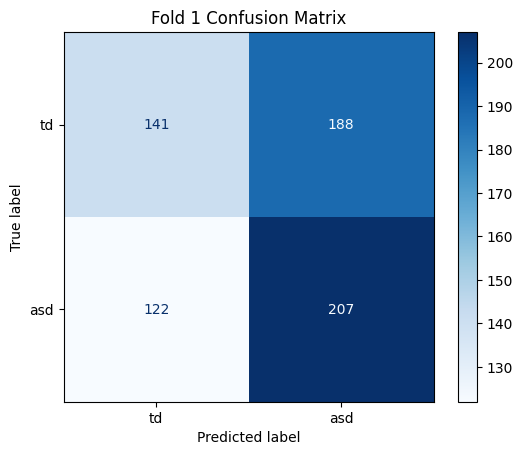


--- FOLD 2 / 4 ---
TESTING on: Round-2
TRAINING on: ['Round-1', 'Round-3', 'Round-4']
Loading data...
Training data shape (segments, features): (1970, 617)
Test data shape (segments, features): (658, 597)
Scaling features...
Training Random Forest model...
Evaluating model...

--- Fold 2 Results ---
Accuracy: 89.36%
Classification Report:
              precision    recall  f1-score   support

          td       0.91      0.87      0.89       329
         asd       0.88      0.91      0.90       329

    accuracy                           0.89       658
   macro avg       0.89      0.89      0.89       658
weighted avg       0.89      0.89      0.89       658



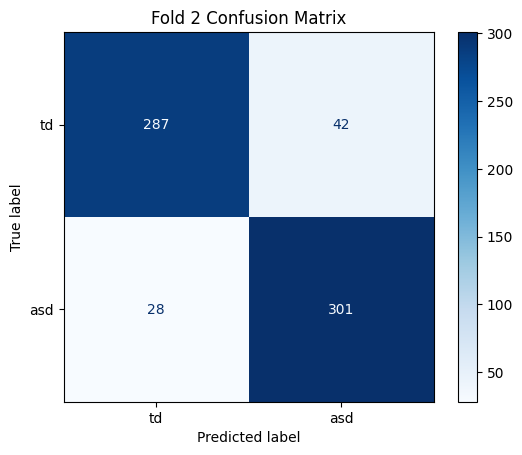


--- FOLD 3 / 4 ---
TESTING on: Round-3
TRAINING on: ['Round-1', 'Round-2', 'Round-4']
Loading data...
Training data shape (segments, features): (1974, 617)
Test data shape (segments, features): (654, 617)
Scaling features...
Training Random Forest model...
Evaluating model...

--- Fold 3 Results ---
Accuracy: 63.00%
Classification Report:
              precision    recall  f1-score   support

          td       0.65      0.57      0.61       329
         asd       0.61      0.69      0.65       325

    accuracy                           0.63       654
   macro avg       0.63      0.63      0.63       654
weighted avg       0.63      0.63      0.63       654



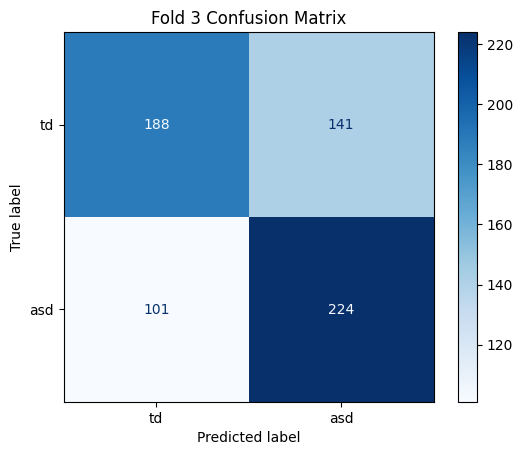


--- FOLD 4 / 4 ---
TESTING on: Round-4
TRAINING on: ['Round-1', 'Round-2', 'Round-3']
Loading data...
Training data shape (segments, features): (1970, 617)
Test data shape (segments, features): (658, 617)
Scaling features...
Training Random Forest model...
Evaluating model...

--- Fold 4 Results ---
Accuracy: 72.34%
Classification Report:
              precision    recall  f1-score   support

          td       0.67      0.87      0.76       329
         asd       0.81      0.58      0.68       329

    accuracy                           0.72       658
   macro avg       0.74      0.72      0.72       658
weighted avg       0.74      0.72      0.72       658



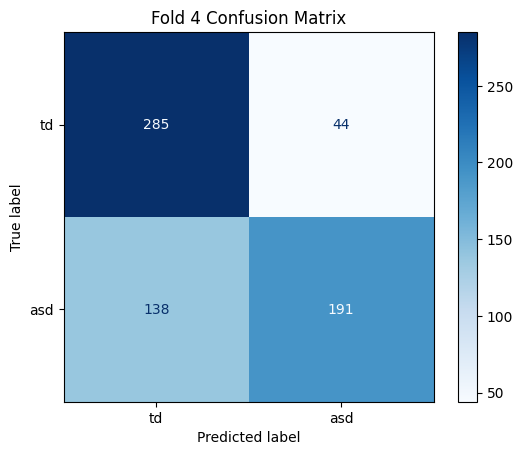


--- Cross-Validation Complete ---
All Fold Accuracies: ['52.89%', '89.36%', '63.00%', '72.34%']

Final Average Accuracy: 69.40% (± 13.42%)

Average Classification Report (across all folds):
              precision  recall  f1-score  support
0                  0.69    0.68      0.68   329.00
1                  0.71    0.70      0.70   328.00
accuracy           0.69    0.69      0.69     0.69
macro avg          0.70    0.69      0.69   657.00
weighted avg       0.70    0.69      0.69   657.00


In [ ]:
# @title
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.impute import SimpleImputer

#The main folder containing your 4 "Round" subfolders
base_folder = "/content/drive/MyDrive/Design_Project/Final_label2"

fold_folders = [
    os.path.join(base_folder, "Round-1"),
    os.path.join(base_folder, "Round-2"),
    os.path.join(base_folder, "Round-3"),
    os.path.join(base_folder, "Round-4")
]
N_SPLITS = 4

# lable col name
TARGET_COLUMN = 'Group'

#   labelling as 1 for asd patient, 0 for typicaly developed
LABEL_MAP = {
    'asd': 1,
    'td': 0
}

def load_data_from_folders(list_of_folder_paths):
    """
    Loads all '*_LABELED.csv' files from a list of folders
    and stacks them into one big DataFrame.
    """
    all_dfs = []
    for folder_path in list_of_folder_paths:
        # find all the files
        glob_pattern = os.path.join(folder_path, "*_LABELED.csv")
        csv_files = glob.glob(glob_pattern)

        if not csv_files:
            print(f"Warning: No '_LABELED.csv' files found in {folder_path}")
            continue

        for file_path in csv_files:
            try:
                df = pd.read_csv(file_path)
                all_dfs.append(df)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    if not all_dfs:
        return pd.DataFrame()

    # Stack data in one
    return pd.concat(all_dfs, ignore_index=True)

def run_cross_validation():
    """
    Main function to run the 4-fold cross-validation.
    """
    warnings.filterwarnings("ignore")

    # This list will store the final accuracy from each of the 4 runs
    all_fold_accuracies = []
    # We will store the actual y_test and y_pred values, not the report string
    all_fold_predictions = []

    print(f"Starting {N_SPLITS}-Fold Cross-Validation...")

    # This loop runs 4 times, once for each "Round"
    for i in range(N_SPLITS):

        print(f"\n=================================================")
        print(f"--- FOLD {i+1} / {N_SPLITS} ---")


        # The test folder is the current one in the loop
        test_folder = [fold_folders[i]]

        # The train folders are rest of the folders
        train_folders = [fold_folders[j] for j in range(N_SPLITS) if j != i]

        print(f"TESTING on: {os.path.basename(test_folder[0])}")
        print(f"TRAINING on: {[os.path.basename(f) for f in train_folders]}")

        train_df = load_data_from_folders(train_folders)
        test_df = load_data_from_folders(test_folder)

        if train_df.empty or test_df.empty:
            print("Error: No data loaded for this fold. Skipping.")
            continue

        print(f"Training data shape (segments, features): {train_df.shape}")
        print(f"Test data shape (segments, features): {test_df.shape}")


        # mapping text labels
        y_train = train_df[TARGET_COLUMN].map(LABEL_MAP)
        y_test = test_df[TARGET_COLUMN].map(LABEL_MAP)

        # Drop the label column from the features
        X_train = train_df.drop(columns=[TARGET_COLUMN])
        X_test = test_df.drop(columns=[TARGET_COLUMN])


        # Convert any text columns (like 'Gender') to numbers
        #    This makes 'Gender_M' (0 or 1) etc.
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)


        #    It ensures X_test has the exact same columns in the same order
        #    as X_train. Fills any missing with 0.
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


        #  for any NaN  We'll just fill them with 0.
        imputer = SimpleImputer(strategy='constant', fill_value=0)
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)

        # This prevents data leakage.
        print("Scaling features...")
        scaler = StandardScaler()

        #fit on trainng data
        scaler.fit(X_train)

        # transform both the data
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        print("Training Random Forest model...")

        # We use class_weight='balanced' to help with any imbalance
        # between the number of 'asd' and 'td' segments.
        model = RandomForestClassifier(
            n_estimators=100,      # 100 "decision trees"
            random_state=42,       # seeding for reproducible results.
            class_weight='balanced'
        )

        model.fit(X_train_scaled, y_train)

        #evalutaion for the model on the val data
        print("Evaluating model...")
        y_pred = model.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        report_string = classification_report(
            y_test,
            y_pred,
            target_names=[key for key, val in LABEL_MAP.items() if val == 0] +
                         [key for key, val in LABEL_MAP.items() if val == 1]
        )

        all_fold_accuracies.append(acc)
        # Instead of appending the report string, we append the raw data
        all_fold_predictions.append({'y_true': y_test, 'y_pred': y_pred})

        print(f"\n--- Fold {i+1} Results ---")
        print(f"Accuracy: {acc * 100:.2f}%")
        print("Classification Report:")
        print(report_string) # Print the string report for this fold

        # Plot and show the confusion matrix for this fold
        ConfusionMatrixDisplay.from_predictions(
            y_test,
            y_pred,
            display_labels=[key for key, val in LABEL_MAP.items() if val == 0] +
                             [key for key, val in LABEL_MAP.items() if val == 1],
            cmap='Blues'
        )
        plt.title(f"Fold {i+1} Confusion Matrix")
        plt.show()

    #final avg step
    print("\n=================================================")

    mean_accuracy = np.mean(all_fold_accuracies)
    std_accuracy = np.std(all_fold_accuracies)

    print(f"All Fold Accuracies: {[f'{acc*100:.2f}%' for acc in all_fold_accuracies]}")
    print(f"\nFinal Average Accuracy: {mean_accuracy * 100:.2f}% (± {std_accuracy * 100:.2f}%)")

    print("\nAverage Classification Report (across all folds):")
    avg_report_dfs = [
        pd.DataFrame.from_dict(
            classification_report(
                all_fold_predictions[i]['y_true'], # Use the stored y_true
                all_fold_predictions[i]['y_pred'], # Use the stored y_pred
                output_dict=True,
                zero_division=0
            )
        ).transpose()
        for i in range(N_SPLITS)
    ]
    avg_report = pd.concat(avg_report_dfs).groupby(level=0).mean()

    print(avg_report.to_string(float_format="%.2f"))

if __name__ == "__main__":
    run_cross_validation()



**80/20 split test**

In [ ]:
# @title
import os
import glob
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

warnings.filterwarnings("ignore")

DATA_DIR = "/content/drive/MyDrive/Design_Project/Seg_DWT_data5sec"
LABEL_MAP = {'asd': 1, 'td': 0}

def load_dataset(file_list):
    """Helper to load and concat a list of CSVs"""
    dfs = []
    for f in file_list:
        try:
            dfs.append(pd.read_csv(f))
        except Exception as e:
            print(f"Skipping corrupt file {f}: {e}")

    if not dfs:
        return pd.DataFrame()
    return pd.concat(dfs, ignore_index=True)

def train_rf_pipeline():
    # finding the file
    print("Scanning for labeled files...")
    all_files = glob.glob(os.path.join(DATA_DIR, "*_LABELED.csv"))

    if not all_files:
        print("Error: No labeled files found.")
        return

    print(f"Found {len(all_files)} total patient files.")

    # 80/20 Split on FILES
    # We split the file list, not the dataframe, to ensure no patient data leaks into test
    train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

    print(f"Training on {len(train_files)} files | Testing on {len(test_files)} files")

    # Load Data
    print("Loading training data...")
    train_df = load_dataset(train_files)

    print("Loading testing data...")
    test_df = load_dataset(test_files)

    if train_df.empty or test_df.empty:
        print("Error: Data load failed.")
        return


    # Separate Target
    y_train = train_df['Group'].map(LABEL_MAP)
    y_test = test_df['Group'].map(LABEL_MAP)

    X_train = train_df.drop(columns=['Group'])
    X_test = test_df.drop(columns=['Group'])

    # Encode categoricals if any and align columns
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    # Impute missing values with 0
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    X_train_imp = imputer.fit_transform(X_train)
    X_test_imp = imputer.transform(X_test)

    # Standard Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imp)
    X_test_scaled = scaler.transform(X_test_imp)

    # Training
    print("Training Random Forest Classifier...")
    rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Evaluation
    print("Evaluating...")
    y_pred = rf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {acc*100:.2f}%")

    print("\nClassification Report:")
    # Reversing map for display labels
    names = ['TD', 'ASD']
    print(classification_report(y_test, y_pred, target_names=names))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=names, cmap='Blues')
    plt.title("Confusion Matrix (Subject-Independent Split)")
    plt.show()

if __name__ == "__main__":
    train_rf_pipeline()

**80/20 split with +whole**

Finding all '*_features_LABELED.csv' files in: /content/drive/MyDrive/Design_Project/Seg_DWT_data5sec
Found 56 total files.
Splitting file list 80/20...
Using 44 files for TRAINING.
Using 12 files for TESTING.
Loading training data (main + additional)...
Loading testing data (main + additional)...
Total training data shape (segments, features): (3432, 927)
Total testing data shape (segments, features): (929, 932)
Preparing data...
Preprocessing and scaling...
Training Random Forest model...
Evaluating model on the 20% test files...

--- Final Model Results (80/20 File-Based Split) ---
Accuracy: 75.46%
Classification Report:
              precision    recall  f1-score   support

          td       0.75      0.62      0.68       390
         asd       0.76      0.85      0.80       539

    accuracy                           0.75       929
   macro avg       0.75      0.74      0.74       929
weighted avg       0.75      0.75      0.75       929



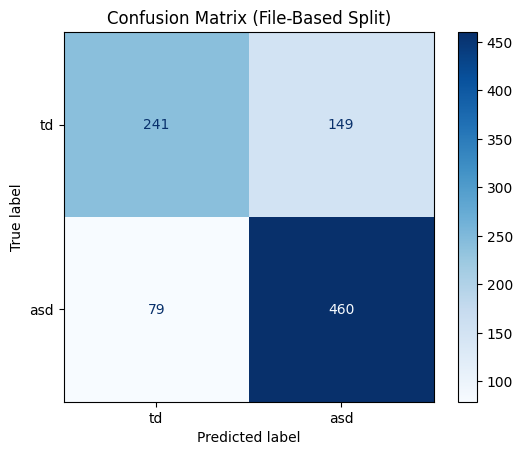

In [ ]:
# @title
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import warnings


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.impute import SimpleImputer


# The main folder containing our 56 CSV files
base_folder = "/content/drive/MyDrive/Design_Project/Seg_DWT_data5sec"

# The folder with the corresponding whole data files
additional_data_folder = "/content/drive/MyDrive/Design_Project/Whole_eeg"

# The name of your label column in the CSVs
TARGET_COLUMN = 'Group'

# (1 = Autism, 0 = Control)
LABEL_MAP = {
    'asd': 1,
    'td': 0
}

def load_data_from_file_list(list_of_files, additional_folder):
    """
    Loads and concatenates a list of CSV file paths.
    Also finds and merges corresponding files from 'additional_folder'.
    """
    all_dfs = []
    for file_path in list_of_files:
        try:
            # Load the main features file
            df_main = pd.read_csv(file_path)

            #Construct the path for the additional file
            file_name = os.path.basename(file_path)
            base_name = file_name.replace("_features_LABELED.csv", "")
            additional_file_name = f"{base_name}_whole.csv"
            additional_file_path = os.path.join(additional_folder, additional_file_name)

            # Load the additional file if it exists
            if os.path.exists(additional_file_path):
                df_additional = pd.read_csv(additional_file_path)

                # Prepare for join: Drop the target column from the additional file
                df_additional_features = df_additional.drop(columns=[TARGET_COLUMN], errors='ignore')


                # This prevents the InvalidIndexError
                num_cols = len(df_additional_features.columns)
                new_cols = [f"add_feat_{i}" for i in range(num_cols)]
                df_additional_features.columns = new_cols

                #Combine side-by-side (axis=1) to make sure rows are in same order
                combined_df = pd.concat([df_main, df_additional_features], axis=1)
                all_dfs.append(combined_df)

            else:
                print(f"Warning: No corresponding file found at {additional_file_path}")
                print(f"         Skipping main file: {file_path}")

        except Exception as e:
            print(f"Error loading or combining {file_path}: {e}")

    if not all_dfs:
        return pd.DataFrame()

    return pd.concat(all_dfs, ignore_index=True)

def run_80_20_file_split():
    """
    Loads all CSVs from the base_folder, splits the FILE LIST 80/20,
    loads corresponding data, and runs the model once.
    """
    warnings.filterwarnings("ignore")

    print(f"Finding all '*_features_LABELED.csv' files in: {base_folder}")

    # Updated glob pattern to be more specific
    glob_pattern = os.path.join(base_folder, "*_features_LABELED.csv")
    csv_files = glob.glob(glob_pattern)

    if not csv_files:
        print(f"Error: No '*_features_LABELED.csv' files found in {base_folder}")
        print("Please check the 'base_folder' path and file naming.")
        return

    print(f"Found {len(csv_files)} total files.")


    print("Splitting file list 80/20")

    train_files, test_files = train_test_split(
        csv_files,
        test_size=0.20,       # 20% of files for test
        random_state=42       # For reproducible split
    )

    print(f"Using {len(train_files)} files for TRAINING.")
    print(f"Using {len(test_files)} files for TESTING.")
    # loading data
    print("Loading training data (main + additional)...")
    train_df = load_data_from_file_list(train_files, additional_data_folder)

    print("Loading testing data (main + additional)...")
    test_df = load_data_from_file_list(test_files, additional_data_folder)

    if train_df.empty or test_df.empty:
        print("Error: No data loaded for train or test set. Exiting.")
        return

    print(f"Total training data shape (segments, features): {train_df.shape}")
    print(f"Total testing data shape (segments, features): {test_df.shape}")


    # Map text labels ('asd'/'td') to numbers (1/0)
    y_train = train_df[TARGET_COLUMN].map(LABEL_MAP)
    y_test = test_df[TARGET_COLUMN].map(LABEL_MAP)

    # Get features by dropping the label
    X_train = train_df.drop(columns=[TARGET_COLUMN])
    X_test = test_df.drop(columns=[TARGET_COLUMN])

    # Convert any text columns (like 'Gender') to numbers
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)

    # Align columns: Ensures test has same columns as train
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    # Handle any potential missing (NaN) values
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Feature Scaling
    scaler = StandardScaler()
    scaler.fit(X_train) # Fit ONLY on training data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Training Random Forest model...")

    model = RandomForestClassifier(
        n_estimators=100,      # Using 100 trees for a robust model
        random_state=42,       # For reproducible results
        class_weight='balanced'
    )
    model.fit(X_train_scaled, y_train)

    print("Evaluating model on the 20% test files...")
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    report_string = classification_report(
        y_test,
        y_pred,
        target_names=[key for key, val in LABEL_MAP.items() if val == 0] +
                     [key for key, val in LABEL_MAP.items() if val == 1]
    )

    print(f"\n--- Final Model Results (80/20 File-Based Split) ---")
    print(f"Accuracy: {acc * 100:.2f}%")
    print("Classification Report:")
    print(report_string)

    # Plot and show the confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=[key for key, val in LABEL_MAP.items() if val == 0] +
                         [key for key, val in LABEL_MAP.items() if val == 1],
        cmap='Blues'
    )
    plt.title("Confusion Matrix (File-Based Split)")
    plt.show()

if __name__ == "__main__":
    run_80_20_file_split()